# **K-Means (Scaled vs Unscaled Data)**

## **Import Library**

In [249]:
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
import plotly.express as px
from sklearn.metrics import silhouette_score

# **Part A - Data Preparation**

## **Load Dataset**

In [250]:
# Load dataset
data = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(data)

# Preview the dataset
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [251]:
# Check shape of the dataset
df.shape

(500, 12)

In [252]:
# View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


There is a total of 12 columns in the dataset: `Income`, `Age`, `Education`, `Credit_Score`, `Years_with_Bank`, `Transaction_Count`, `Balance`, `Loan_Approval_Amount`, `Credit_Card_Limit`, `Purchase_Frequency`, `Customer_Satisfaction`, and `Online_Activity`. The dataset contains no missing (null) values.

In [253]:
# View the statistical summary of numerical variables
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


## **Data Cleaning**

In [254]:
# Check for missing values in dataset
df.isnull().sum()

,0
Income,0
Age,0
Education,0
Credit_Score,0
Years_with_Bank,0
Transaction_Count,0
Balance,0
Loan_Approval_Amount,0
Credit_Card_Limit,0
Purchase_Frequency,0


In [255]:
# Check for duplicate rows in dataset
df[df.duplicated(keep=False)]

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity


## **Data Encoding**

In [256]:
# Show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Income': array([66161.01279, 78639.20248, 70207.25321, 65866.23872, 56774.10995,
        73442.05848, 57819.04084, 91882.97506, 97274.70704, 53758.11391,
        84379.37786, 64667.11898, 67603.34208, 94419.74787, 30327.70436,
        31534.69748, 26516.37981, 87446.48842, 83361.75632, 90250.91112,
        98396.37567, 84936.89232, 59610.95217, 83539.68822, 33870.58194,
        72994.0766 , 35751.49656, 95850.16878, 64138.62413, 56099.6455 ,
        44841.67091, 83067.52671, 59211.27492, 67632.54617, 26409.23503,
        71322.66228, 70907.1792 , 71270.04977, 95781.10589, 76136.52243,
        51963.09254, 57777.39653, 77322.33969, 29516.91037, 75007.50366,
        75297.84022, 40778.69208, 34669.47232, 48657.12632, 52278.30782,
        67764.75778, 57895.11351, 99128.03785, 32653.36081, 40665.75671,
        37098.21384, 73983.12441, 43996.87019, 59973.30796, 43331.9194 ,
        36922.71877, 33278.13559, 74224.71921, 35363.72135, 39743.67713,
        52654.3878 , 86574.49224, 32282.5

In [257]:
# 1. Ordinal Encoding
area_category_mapping = {'High School': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3}
df['Education'] = df['Education'].map(area_category_mapping)

df.sample(n = 5)

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
389,54882.56940,42,0,829,3,45,9781.124217,42444.76887,17397.697260,0.384831,1,0.417983
22,59610.95217,54,0,598,5,25,1887.053662,26567.32122,4201.738091,0.688512,4,0.842161
399,38892.42439,61,1,674,11,40,6515.042223,24367.64006,12875.171930,0.255602,4,0.615655
342,59489.19128,52,0,501,3,86,8737.523092,40937.24877,3625.020949,0.930873,1,0.884206
370,77471.65407,59,1,610,11,8,6489.986633,24933.90950,1399.293730,0.399527,4,0.236124


# **Part B - Exploratory Data Analysis**

## **Distribution of Customer Satisfaction Levels**

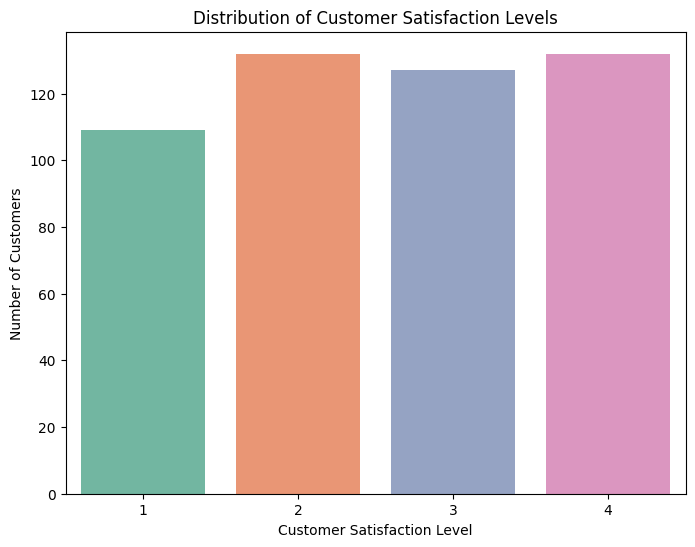

In [258]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer_Satisfaction', hue='Customer_Satisfaction', data=df, palette='Set2', legend=False)

plt.title('Distribution of Customer Satisfaction Levels')
plt.xlabel('Customer Satisfaction Level')
plt.ylabel('Number of Customers')

plt.show()



1.   Balanced but Slightly Higher Satisfaction in Levels 2-4
*   The number of customers with satisfaction levels 2, 3, and 4 is slightly higher than those with level 1.
*   This indicates that most customers report moderate to high satisfaction, suggesting generally positive experiences with the bank's products or services.

2.   Low dissatisfaction segment (Level 1)
*   Satisfaction level 1 (lowest satisfaction) has the fewest customers.
*   This may reflect that only a small proportion of customers are dissatisfied, but further analysis could identify what factors drive this group's lower satisfaction (e.g., low credit limit, high loan amount, or shorter relationship with the bank).
3.   Potential stability in customer sentiment
*   The relatively even distribution across satisfaction levels implies no extreme polarization — most customers fall within a consistent satisfaction range.
*   However, it also means there's room to improve overall satisfaction, possibly by enhancing digital services, increasing rewards, or simplifying loan processes.

## **Purchase Frequency across Education Levels**

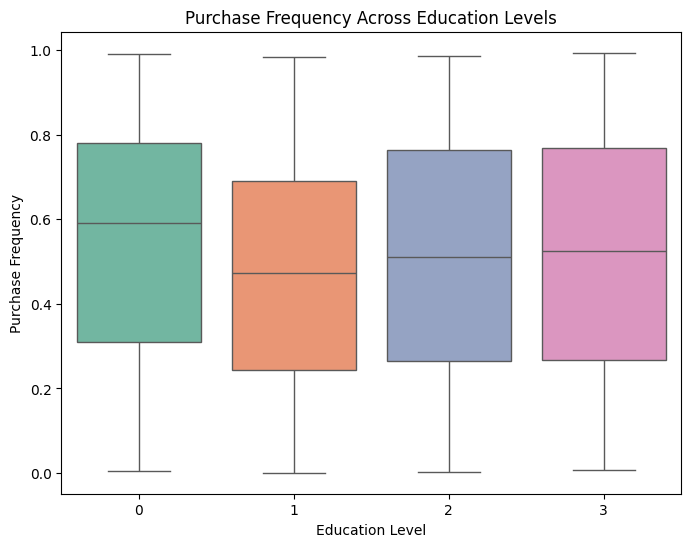

In [259]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Education', y='Purchase_Frequency', hue='Education', data=df, palette='Set2', legend=False)

plt.title('Purchase Frequency Across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Purchase Frequency')
plt.show()



1.   Relatively Similar Purchase Behavior Across Education Levels
*   The median purchase frequency appears fairly consistent across all education levels (0–3).
*   This indicates that education does not strongly influence purchase frequency — customers from all education backgrounds engage in purchases at comparable rates.

2.   Slightly Higher Median for Lower Education Levels
*   Education level 0 (e.g., High School) shows a slightly higher median purchase frequency than the others.
*   This suggests that customers with lower education levels might engage in more frequent transactions, possibly due to smaller but more regular purchases.

3.   Wide Variation Across All Groups
*   Each education level displays a broad interquartile range, meaning there’s significant diversity in purchase behavior within each group.
*   Some highly educated customers purchase often, while others rarely do — implying that purchase habits are influenced by other factors (e.g., income, credit limit, or online activity), not education alone.

4.   Presence of Outliers
*   A few extreme points (if visible) indicate customers who purchase significantly more or less frequently than average.
*   These outliers could represent loyal high-frequency spenders or inactive customers worth further analysis.

# **Part C - Clustering Modeling**

## **Data Scaling**

In [260]:
# Scale dataset with standard scaler
# Numerical Columns
num_cols = [
    'Income', 'Age', 'Credit_Score', 'Years_with_Bank', 'Transaction_Count',
    'Balance', 'Loan_Approval_Amount', 'Credit_Card_Limit', 'Purchase_Frequency', 'Online_Activity'
]

# Categorical Columns
cat_cols = ['Education', 'Customer_Satisfaction']

sc = StandardScaler()

df_scaled_num = pd.DataFrame(sc.fit_transform(df[num_cols]), columns=num_cols)
df_sc_scaled = pd.concat([df_scaled_num, df[cat_cols].reset_index(drop=True)], axis=1)
df_sc_scaled.head()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Online_Activity,Education,Customer_Satisfaction
0,0.179150,1.303097,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-0.992013,1,1
1,0.749977,1.533191,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,0.186427,0,2
2,0.364249,0.459420,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,1.184595,0,3
3,0.165665,0.152629,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,-1.274907,0,4
4,-0.250263,-0.307558,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.684898,1,4


## **K-Means Clustering for Scaled Data**

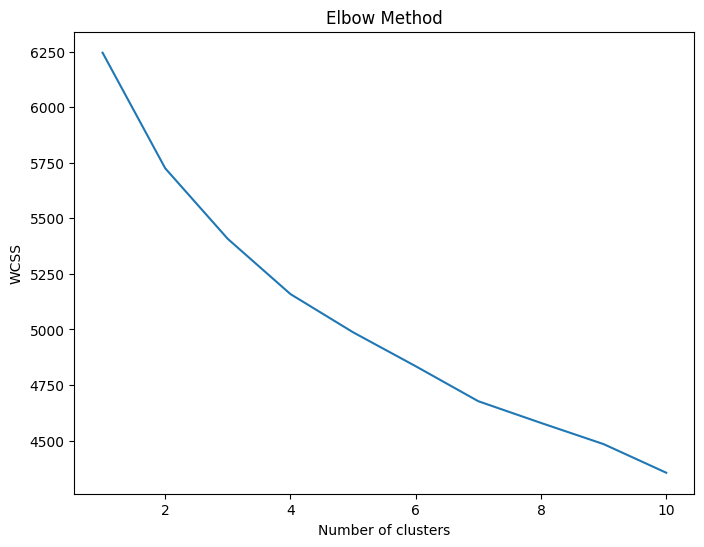

In [261]:
wcss = []
for i in range(1, 11): # Clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [262]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
wcss_table

,Number of Clusters,WCSS
0,1,6245.344000
1,2,5725.270351
2,3,5407.379912
3,4,5159.177404
4,5,4987.248684
5,6,4834.499329
6,7,4676.962335
7,8,4579.354232
8,9,4484.019548
9,10,4355.281262


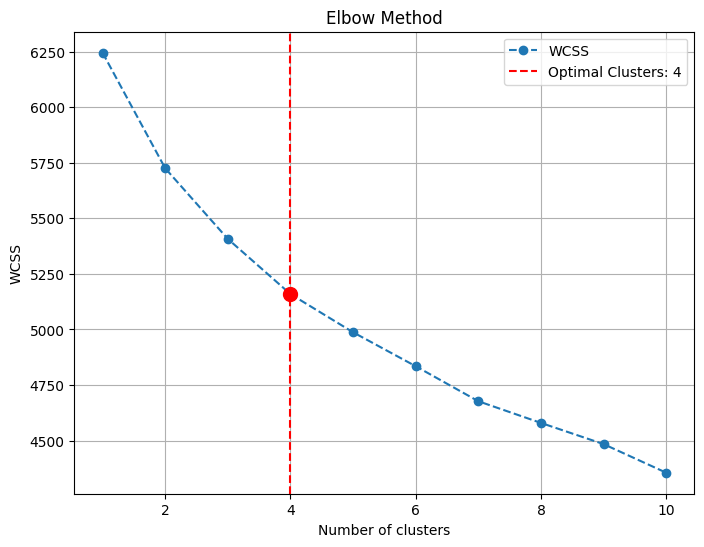

The optimal number of clusters is: 4


In [263]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5) # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [264]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters_scaled = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['Scaled_K-Means_Cluster'] = clusters_scaled

# Show the df
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Scaled_K-Means_Cluster
0,66161.01279,57,1,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,3
1,78639.20248,60,0,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,3
2,70207.25321,46,0,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,1
3,65866.23872,42,0,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,3
4,56774.10995,36,1,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,1


## **K-Means Clustering for Unscaled Data**

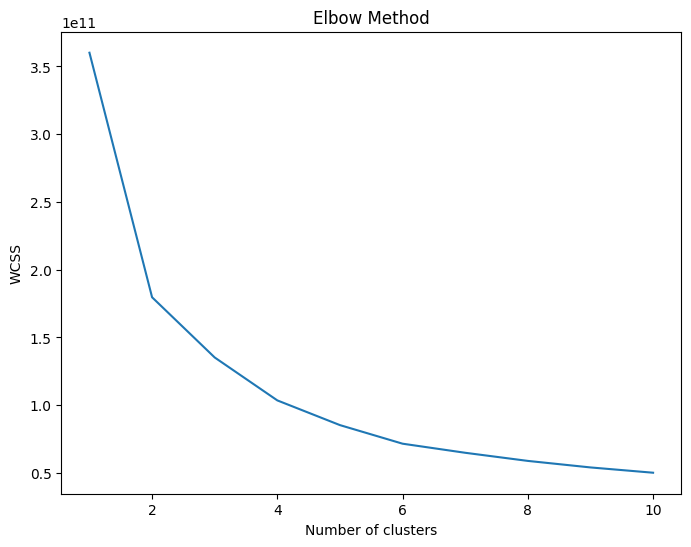

In [265]:
wcss = []
for i in range(1, 11): # Clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [266]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
wcss_table

,Number of Clusters,WCSS
0,1,3.601357e+11
1,2,1.796223e+11
2,3,1.351798e+11
3,4,1.034966e+11
4,5,8.526114e+10
5,6,7.154790e+10
6,7,6.483984e+10
7,8,5.884440e+10
8,9,5.402806e+10
9,10,5.012191e+10


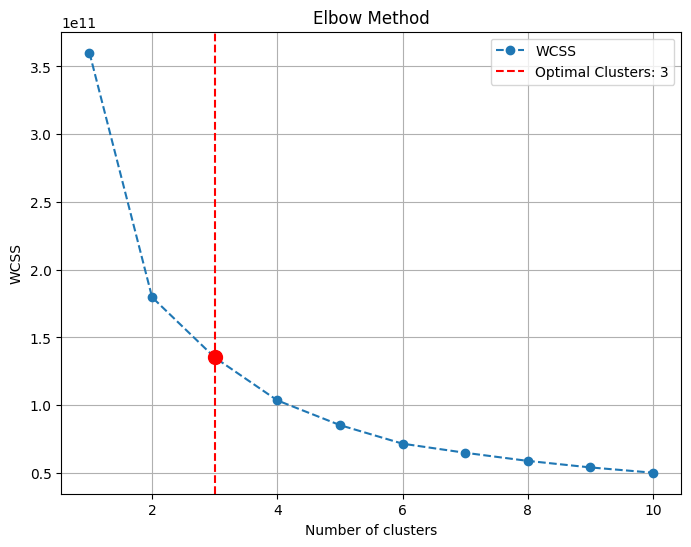

The optimal number of clusters is: 3


In [267]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5) # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [268]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters_unscaled = kmeans.fit_predict(df)

# Add the cluster labels to the DataFrame
df['Unscaled_K-Means_Cluster'] = clusters_unscaled

# Show the df
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Scaled_K-Means_Cluster,Unscaled_K-Means_Cluster
0,66161.01279,57,1,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,3,2
1,78639.20248,60,0,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,3,1
2,70207.25321,46,0,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,1,2
3,65866.23872,42,0,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,3,1
4,56774.10995,36,1,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,1,1


## **Model Evaluation**

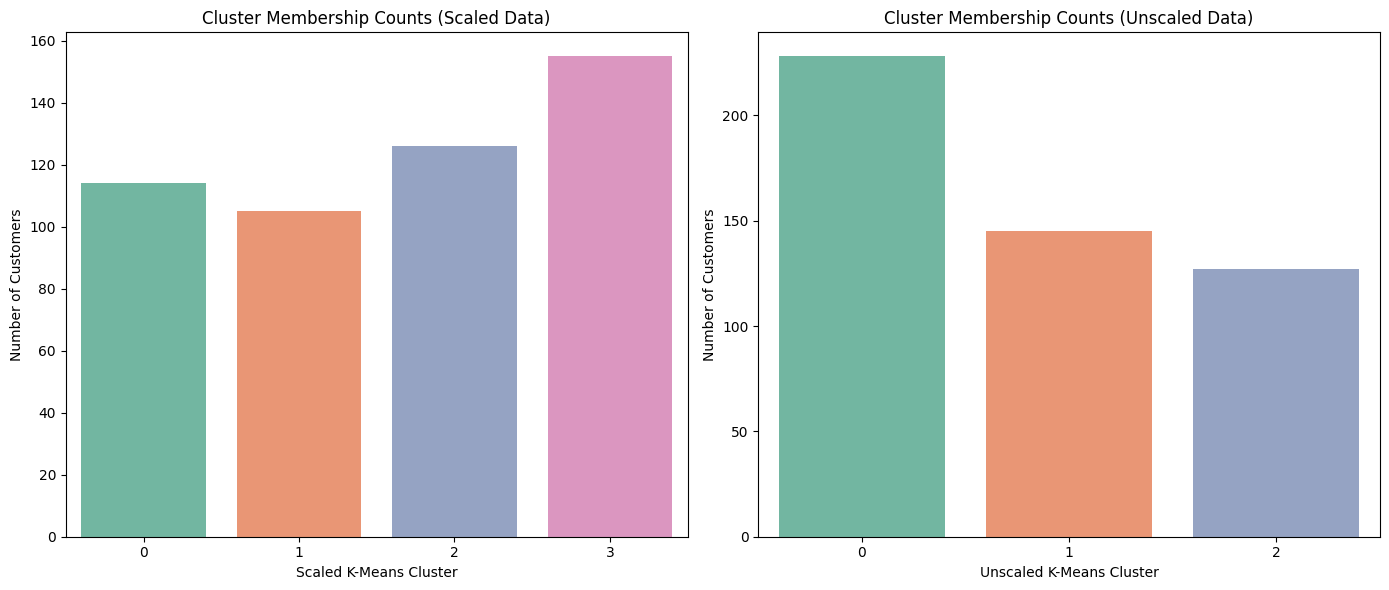

In [269]:
plt.figure(figsize=(14, 6))

# Scaled K-Means Clusters
plt.subplot(1, 2, 1)
sns.countplot(
    x='Scaled_K-Means_Cluster',
    hue='Scaled_K-Means_Cluster',
    data=df,
    palette='Set2',
    legend=False
)
plt.title('Cluster Membership Counts (Scaled Data)')
plt.xlabel('Scaled K-Means Cluster')
plt.ylabel('Number of Customers')

# Unscaled K-Means Clusters
plt.subplot(1, 2, 2)
sns.countplot(
    x='Unscaled_K-Means_Cluster',
    hue='Unscaled_K-Means_Cluster',
    data=df,
    palette='Set2',
    legend=False
)
plt.title('Cluster Membership Counts (Unscaled Data)')
plt.xlabel('Unscaled K-Means Cluster')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

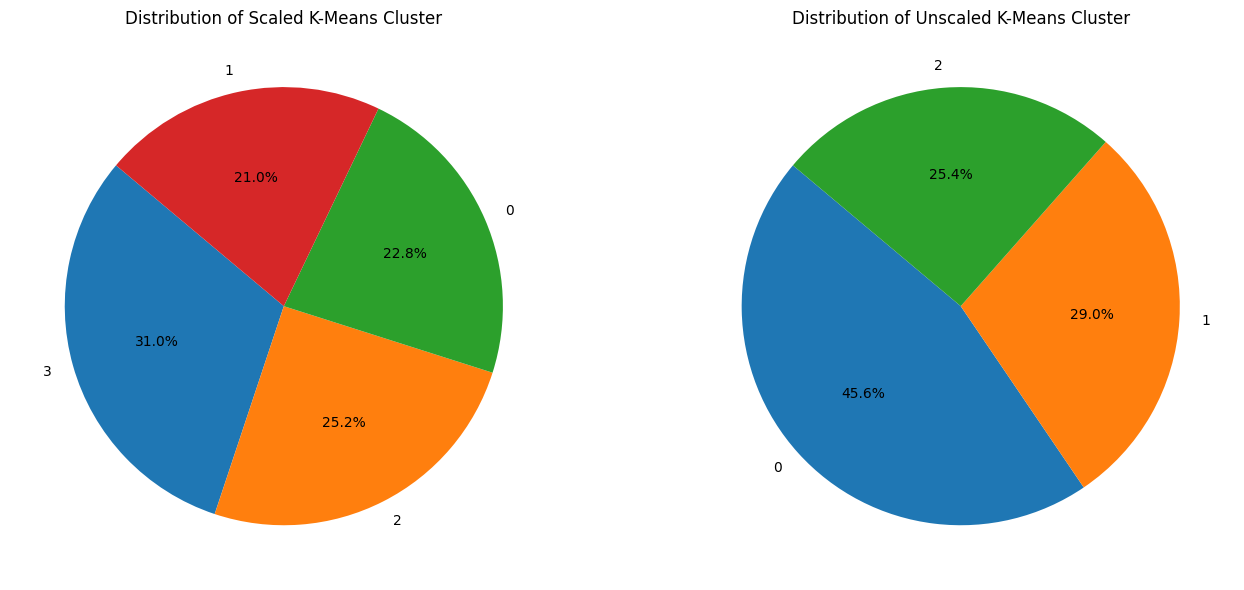

In [270]:
plt.figure(figsize=(14, 6))

# Counts of each unique value in the 'Scaled_K-Means_Cluster' column
plt.subplot(1, 2, 1)
y_counts_scaled = df['Scaled_K-Means_Cluster'].value_counts()
plt.pie(
    y_counts_scaled,
    labels=y_counts_scaled.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Distribution of Scaled K-Means Cluster')

# Counts of each unique value in the 'Unscaled_K-Means_Cluster' column
plt.subplot(1, 2, 2)
y_counts_unscaled = df['Unscaled_K-Means_Cluster'].value_counts()
plt.pie(
    y_counts_unscaled,
    labels=y_counts_unscaled.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Distribution of Unscaled K-Means Cluster')

plt.tight_layout()
plt.show()

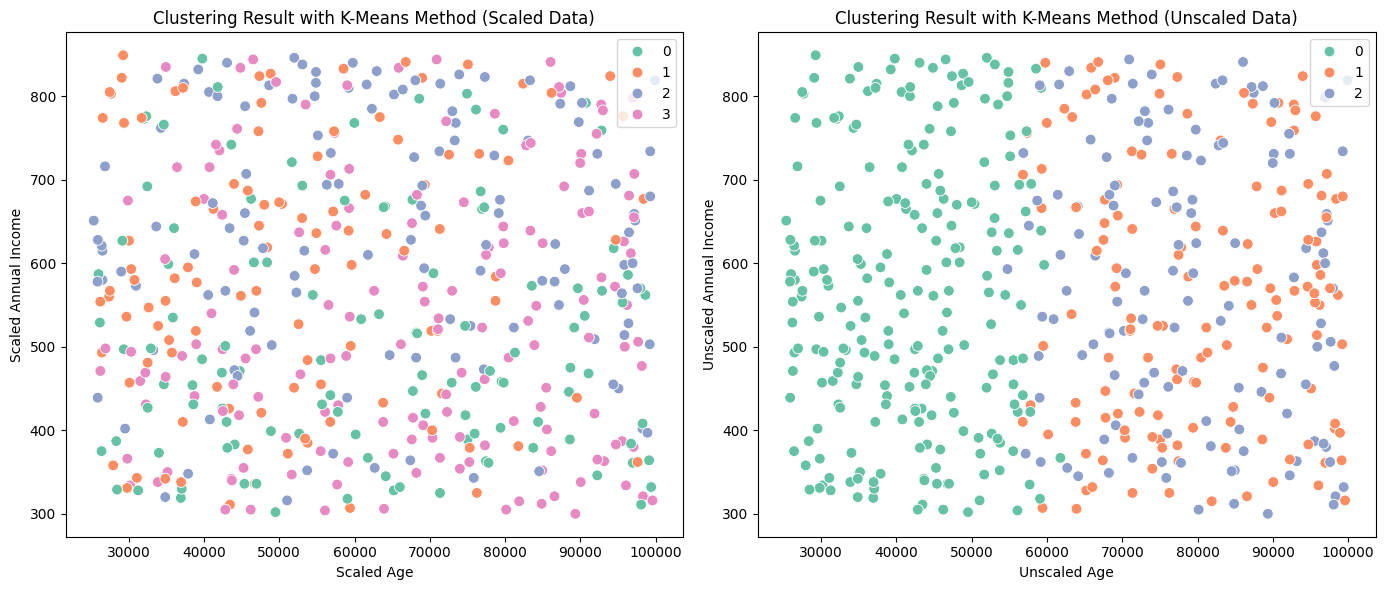

In [271]:
plt.figure(figsize=(14, 6))

# Counts of each unique value in the 'Scaled_K-Means_Cluster' column
plt.subplot(1, 2, 1)
sns.scatterplot(x = "Income", y = "Credit_Score", hue="Scaled_K-Means_Cluster", palette="Set2", data=df, s = 60)
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Annual Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()

# Counts of each unique value in the 'Unscaled_K-Means_Cluster' column
plt.subplot(1, 2, 2)
sns.scatterplot(x = "Income", y = "Credit_Score", hue="Unscaled_K-Means_Cluster", palette="Set2", data=df, s = 60)
plt.xlabel("Unscaled Age")
plt.ylabel("Unscaled Annual Income")
plt.title("Clustering Result with K-Means Method (Unscaled Data)")
plt.legend()

plt.tight_layout()
plt.show()

In [272]:
fig = px.scatter_3d(
    df,
    x='Age',
    y='Income',
    z='Credit_Score',
    color='Scaled_K-Means_Cluster',
    color_continuous_scale='viridis',
    title='3D Scatter: Age vs Income vs Credit Score',
    labels={
        'Age': 'Age',
        'Income': 'Income',
        'Credit_Score': 'Credit Score'
    }
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False)
))

fig.show()

In [273]:
fig = px.scatter_3d(
    df,
    x='Age',
    y='Income',
    z='Credit_Score',
    color='Unscaled_K-Means_Cluster',
    color_continuous_scale='viridis',
    title='3D Scatter: Age vs Income vs Credit Score',
    labels={
        'Age': 'Age',
        'Income': 'Income',
        'Credit_Score': 'Credit Score'
    }
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False)
))

fig.show()

In [274]:
# Calculate Silhouette Score for Scaled K-Means Cluster
silhouette_scaled = silhouette_score(df_sc_scaled, df['Scaled_K-Means_Cluster'])
print(f"Silhouette Score for Scaled K-Means Cluster: {silhouette_scaled:.3f}")

# Calculate Silhouette Score for Unscaled K-Means Cluster
silhouette_unscaled = silhouette_score(df.drop(columns=['Scaled_K-Means_Cluster', 'Unscaled_K-Means_Cluster']), df['Unscaled_K-Means_Cluster'])
print(f"Silhouette Score for Unscaled K-Means Cluster: {silhouette_unscaled:.3f}")

Silhouette Score for Scaled K-Means Cluster: 0.073
Silhouette Score for Unscaled K-Means Cluster: 0.348


# **Part D - Segmentation & Managerial Implication**

In [275]:
# Reverse the 'Education' column back to categorical
reverse_area_category_mapping = {0: 'High School', 1: 'Bachelor', 2: 'Master', 3: 'PhD'}
df['Education'] = df['Education'].map(reverse_area_category_mapping)

df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Scaled_K-Means_Cluster,Unscaled_K-Means_Cluster
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,3,2
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,3,1
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,1,2
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,3,1
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,1,1


## **Data Summary**

In [277]:
# Data summary for 'Scaled_K-Means_Cluster'
cluster_summary = df.groupby(clusters_scaled).agg({
    'Income': ['mean', 'median'],
    'Age': ['mean', 'median'],
    'Education': ['first', 'count'],
    'Credit_Score': ['mean', 'median'],
    'Years_with_Bank': ['mean', 'median'],
    'Transaction_Count': ['mean', 'median'],
    'Balance': ['mean', 'median'],
    'Loan_Approval_Amount': ['mean', 'median'],
    'Credit_Card_Limit': ['mean', 'median'],
    'Purchase_Frequency': ['mean', 'median'],
    'Customer_Satisfaction': ['first', 'count'],
    'Online_Activity': ['mean', 'median']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Income                      Age           Education        \
                 mean        median       mean median         mode count   
cluster                                                                    
0        62600.976281  63971.399505  44.157895   44.5          PhD   114   
1        52282.326936  48848.738450  41.238095   42.0  High School   105   
2        63943.517653  63803.548885  34.031746   33.0  High School   126   
3        67350.791653  69323.812400  40.987097   42.0     Bachelor   155   

        Credit_Score        Years_with_Bank         ... Loan_Approval_Amount  \
                mean median            mean median  ...                 mean   
cluster                                             ...                        
0         509.052632  471.0       12.385965   13.0  ...         27310.563280   
1         591.000000  593.0       11.066667   11.0  ...         28705.428730   
2         634.325397  632.5        8.452381    8.0  ...         25071.961425   
3         532.154839  502.0       11.380645   12.0  ...         22007.856954   

                      Credit_Card_Limit               Purchase_Frequency  \
               median              mean        median               mean   
cluster                                                                    
0        27971.072315       9632.201164   8558.881277           0.548994   
1        29843.597970       8527.699324   7610.467453           0.486746   
2        25585.324535      12248.029369  13306.292315           0.475489   
3        20732.653480      11408.097833  11960.525930           0.534007   

                  Customer_Satisfaction       Online_Activity            
           median                  mode count            mean    median  
cluster                                                                  
0        0.588134                     4   114        0.470010  0.407522  
1        0.481914                     3   105        0.759569  0.804369  
2        0.473898                     1   126        0.531914  0.546802  
3        0.571263                     1   155        0.302588  0.248530  

[4 rows x 24 columns]

In [278]:
# Data summary for 'Unscaled_K-Means_Cluster'
cluster_summary = df.groupby(clusters_unscaled).agg({
    'Income': ['mean', 'median'],
    'Age': ['mean', 'median'],
    'Education': ['first', 'count'],
    'Credit_Score': ['mean', 'median'],
    'Years_with_Bank': ['mean', 'median'],
    'Transaction_Count': ['mean', 'median'],
    'Balance': ['mean', 'median'],
    'Loan_Approval_Amount': ['mean', 'median'],
    'Credit_Card_Limit': ['mean', 'median'],
    'Purchase_Frequency': ['mean', 'median'],
    'Customer_Satisfaction': ['first', 'count'],
    'Online_Activity': ['mean', 'median']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Income                     Age           Education        \
                 mean       median       mean median         mode count   
cluster                                                                   
0        41785.918734  42451.41708  39.973684   39.5     Bachelor   228   
1        79841.469843  78764.47609  41.193103   41.0  High School   145   
2        78883.535088  77993.10297  38.724409   37.0     Bachelor   127   

        Credit_Score        Years_with_Bank         ... Loan_Approval_Amount  \
                mean median            mean median  ...                 mean   
cluster                                             ...                        
0         563.355263  560.5       11.021930   11.0  ...         25645.043592   
1         560.434483  556.0       10.944828   12.0  ...         36968.695785   
2         573.133858  570.0       10.259843   10.0  ...         11734.081654   

                     Credit_Card_Limit               Purchase_Frequency  \
              median              mean        median               mean   
cluster                                                                   
0        24691.85620      10808.300213  11391.264670           0.512556   
1        36805.31988      10476.592032   9918.733119           0.517569   
2        11554.03388      10406.204198  10219.543930           0.507607   

                  Customer_Satisfaction       Online_Activity            
           median                  mode count            mean    median  
cluster                                                                  
0        0.532515                     4   228        0.525803  0.535615  
1        0.548403                     2   145        0.474545  0.418266  
2        0.510079                     1   127        0.461151  0.402645  

[3 rows x 24 columns]

The **unscaled K-Means version produces clearer cluster separation** compared to the scaled version. This is supported by the **higher Silhouette Score (0.348 vs 0.073)**, indicating that the clusters in the unscaled data are more distinct and well-formed.

Scaling affects clustering results because K-Means is a distance-based algorithm — it relies on Euclidean distances to assign points to the nearest centroid. When data is scaled, all features contribute equally to the distance computation, regardless of their original range or unit. This can be beneficial when features have very different scales, but in some cases, scaling can also reduce natural distinctions between clusters if the original magnitude of certain features carries meaningful variation. In this dataset, it appears that the original feature magnitudes (unscaled data) better reflect the true differences between customer groups, resulting in clearer cluster separation.

## **Cluster's Characteristics & Managerial Recommendations**

### **Cluster 0: Moderate-Income, Mid-Age, Balanced Customers**
Profile:
*   Average Income: ≈ \$41,800
*   Average Age: ≈ 40 years
*   Education: Mostly Bachelor
*   Credit Score: ~563 (average)
*   Loan Approval: Moderate (~\$25,000)
*   Credit Card Limit: Moderate (~\$10,800)
*   Purchase Frequency: ~0.51 (balanced spending behavior)

Implications:
*   Represents a financially stable middle-class segment with moderate engagement.
Offer convenience-oriented financial products (e.g., bundled banking, cashback cards).
*   Retention priority: medium - maintain loyalty through personalized offers and digital engagement.
*   Use cross-sell strategies such as introducing investment or insurance products.

### **Cluster 1: High-Income, Slightly Older, Loyal Spenders**
Profile:
*   Average Income: ≈ \$79,800
*   Average Age: ≈ 41 years
*   Education: Mostly High School
*   Credit Score: ~560 (slightly below average)
*   Loan Approval: High (~\$37,000)
*   Credit Card Limit: High (~\$10,400)
*   Purchase Frequency: ~0.52 (slightly above average)

Implications:
*   These are affluent, established customers with strong purchasing power and good credit relationships.
*   Focus on premium and high-value product offerings (e.g., gold credit cards, travel rewards, exclusive memberships).
*   Retention priority: high - maintain through VIP programs and exclusive experiences.
*   Ideal target for loyalty upgrades and long-term financial products (mortgages, investments).

### **Cluster 2: High-Income, Younger, Cautious Consumers**
Profile:
*   Average Income: ≈ \$78,800
*   Average Age: ≈ 38 years
*   Education: Mostly Bachelor
*   Credit Score: ~573 (highest among clusters)
*   Loan Approval: Low (~\$11,700)
*   Credit Card Limit: Slightly lower (~\$10,400)
*   Purchase Frequency: ~0.51 (moderate)

Implications:
*   Younger professionals with strong financial potential but more risk-averse or cautious in spending.
*   Opportunity to grow future value through education on investment and financial planning products.
*   Growth priority: high - nurture via targeted campaigns promoting aspirational and lifestyle upgrades.
*   Engage digitally (mobile apps, personalized online offers) to build brand loyalty early.
